<a href="https://colab.research.google.com/github/ssave41/ML/blob/master/ML_03_J041_20072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 3


## Exercise 1 : Exploring Canadian immigration data from 1980 to 2013
Dataset : 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

Question : Which two countries have same immigration trends?







In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [6]:
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [7]:
canada.shape

(195, 43)

Things to do
1. Filtering
2. Basic statistics
3. Line plots
4. Area plots
5. Histograms
6. Bar plots



## Filtering and Basic Statics

In [8]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

Remove unnecessary columns


In [ ]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

In [9]:
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Rename columns

In [10]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region'}, inplace=True)

In [11]:
canada.head()

,Type,Coverage,Country,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Total imigration over years

In [12]:
canada['total_immigration'] = df_can.sum(axis='columns')
canada.head()

NameError: ignored

In [13]:
canada.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [14]:
canada.isnull().sum()

Type                0
Coverage            0
Country             0
AREA                0
Continent           0
REG                 0
Continent-Region    0
DEV                 0
DevName             0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
dtype: int64

In [15]:
canada.dtypes

Type                object
Coverage            object
Country             object
AREA                 int64
Continent           object
REG                  int64
Continent-Region    object
DEV                  int64
DevName             object
1980                 int64
1981                 int64
1982                 int64
1983                 int64
1984                 int64
1985                 int64
1986                 int64
1987                 int64
1988                 int64
1989                 int64
1990                 int64
1991                 int64
1992                 int64
1993                 int64
1994                 int64
1995                 int64
1996                 int64
1997                 int64
1998                 int64
1999                 int64
2000                 int64
2001                 int64
2002                 int64
2003                 int64
2004                 int64
2005                 int64
2006                 int64
2007                 int64
2

Changing index to country

In [16]:
canada.set_index('Country', inplace = True)
canada.head()

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [17]:
print(canada.loc['India'])

Type                        Immigrants
Coverage                    Foreigners
AREA                               935
Continent                         Asia
REG                               5501
Continent-Region         Southern Asia
DEV                                902
DevName             Developing regions
1980                              8880
1981                              8670
1982                              8147
1983                              7338
1984                              5704
1985                              4211
1986                              7150
1987                             10189
1988                             11522
1989                             10343
1990                             12041
1991                             13734
1992                             13673
1993                             21496
1994                             18620
1995                             18489
1996                             23859
1997                     

Convert column names to string

In [18]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Type', 'Coverage', 'AREA', 'Continent', 'REG', 'Continent-Region',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

Finding the countries in asia

In [19]:
condition = canada['Continent'] == 'Asia'
canada[condition]

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Armenia,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207
Azerbaijan,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57
Bahrain,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Using multiple conditions

In [20]:
canada[(canada['Continent']=='Asia')]

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Armenia,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207
Azerbaijan,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57
Bahrain,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [21]:
canada[(canada['1980']>1000)]

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chile,Immigrants,Foreigners,904,Latin America and the Caribbean,931,South America,902,Developing regions,1233,1069,1078,781,681,533,633,1454,990,1023,1286,1749,1175,697,352,273,244,325,376,397,366,369,401,347,383,384,427,530,350,375,340,174,291,273
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
France,Immigrants,Foreigners,908,Europe,926,Western Europe,901,Developed regions,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623
Germany,Immigrants,Foreigners,908,Europe,926,Western Europe,901,Developed regions,1626,1977,3062,2376,1610,1441,1233,1704,1482,1706,1273,1273,1181,1488,1255,1553,1686,1397,1363,1717,1703,1456,1375,1865,2020,2226,2767,2449,3833,3887,2956,2053,1702,1217
Greece,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1065,953,897,633,580,584,547,765,564,773,538,592,492,445,275,220,221,190,141,149,150,135,107,117,120,100,74,110,107,119,101,102,146,298
Guyana,Immigrants,Foreigners,904,Latin America and the Caribbean,931,South America,902,Developing regions,2334,2943,3575,2650,1932,2299,3942,6174,2977,3270,2824,3266,2932,3399,4181,3935,2324,1795,1238,1366,1308,1707,1479,1410,1341,1215,1286,1277,1137,1180,953,804,676,656
Haiti,Immigrants,Foreigners,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,2379,2829,2399,3655,2100,2014,1955,1645,1295,1439,1631,2433,2174,1930,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291


In [22]:
canada[(canada['Continent']=='Asia')&(canada['2013']>10000)]

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544


In [23]:
canada.where(canada['Continent']=='Asia')

,Type,Coverage,AREA,Continent,REG,Continent-Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935.0,Asia,920.0,South-Eastern Asia,902.0,Developing regions,1191.0,1829.0,2162.0,3404.0,7583.0,5907.0,2741.0,1406.0,1411.0,3004.0,3801.0,5870.0,5416.0,6547.0,5105.0,3723.0,2462.0,1752.0,1631.0,1419.0,1803.0,2117.0,2291.0,1713.0,1816.0,1852.0,3153.0,2574.0,1784.0,2171.0,1942.0,1723.0,1731.0,2112.0
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,Immigrants,Foreigners,935.0,Asia,922.0,Western Asia,902.0,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,12.0,7.0,18.0,4.0,18.0,41.0,41.0,39.0,73.0,144.0,121.0,141.0,134.0,122.0,181.0,171.0,113.0,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0


In [24]:
import plotly as px

## Line Plots

Making a lable to plot the graphs

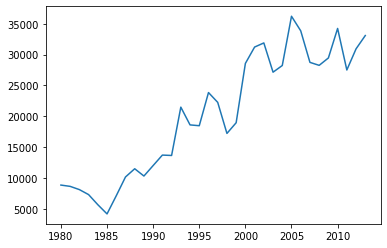

In [25]:
years = list(map(str,range(1980,2014)))
years
india = canada.loc['India',years]
india.plot()

Changing index to integer and adding title, lables and text

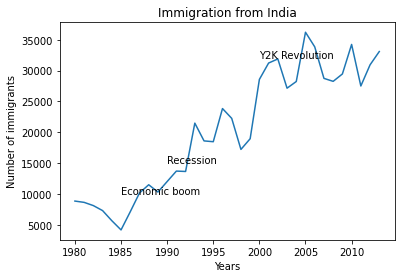

In [26]:
india.index = india.index.map(int)

india.plot(kind='line')
plt.title('Immigration from India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 32000, 'Y2K Revolution')
plt.text(1990,15000,'Recession')
plt.text(1985,10000,'Economic boom')

plt.show()

Plotting the graph of china and comparing graphs

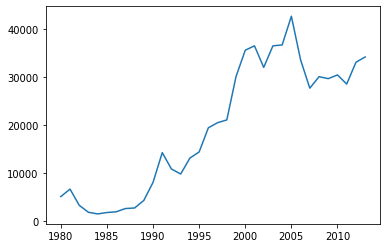

In [27]:
years = list(map(str,range(1980,2014)))
china = canada.loc['China', years]
china.plot()

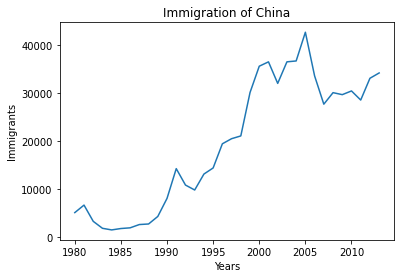

In [28]:
china.index = china.index.map(int)

china.plot(kind='line')

plt.title('Immigration of China')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

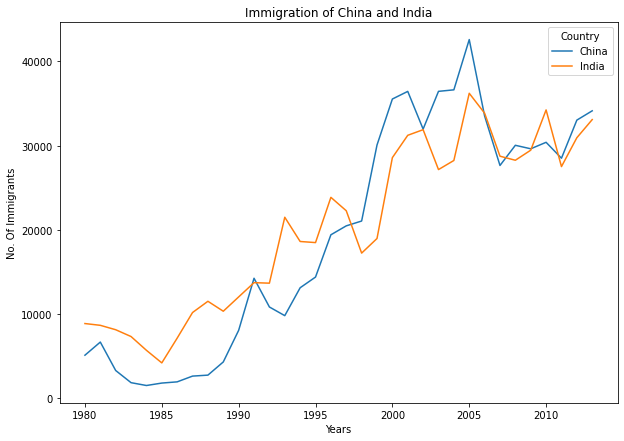

In [29]:
chinaindia = canada.loc[['China','India'], years]
new_chinaindia = chinaindia.transpose()
new_chinaindia.index = new_chinaindia.index.map(int)

new_chinaindia.plot(kind='line', figsize = (10,7))
plt.title('Immigration of China and India')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

Plotting the graphs of france and germany

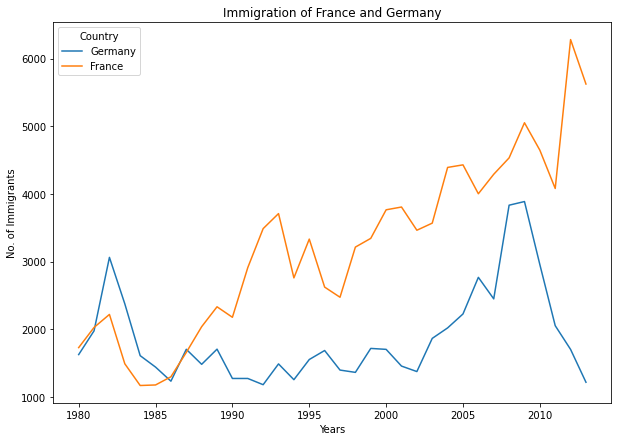

In [37]:
francegermany = canada.loc[['Germany','France'], years]
francegermany = francegermany.transpose()
francegermany.index = francegermany.index.map(int)

francegermany.plot(kind='line', figsize = (10,7))
plt.title('Immigration of France and Germany')
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')
plt.show()

## Histograms

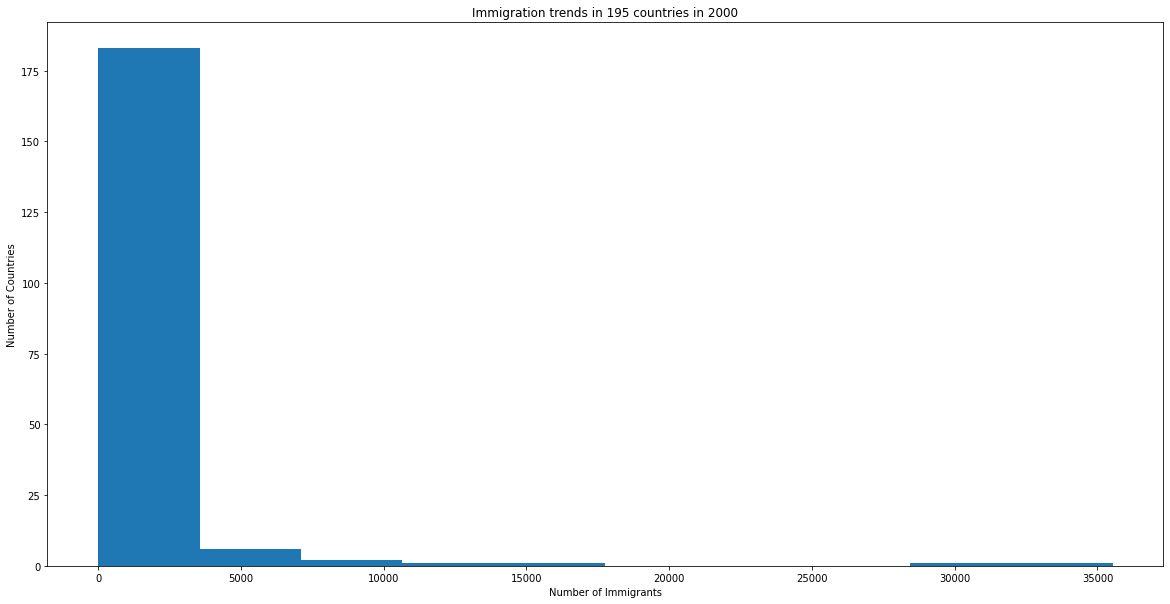

In [38]:
canada['2000'].plot(kind='hist', figsize=(20,10))

plt.title('Immigration trends in 195 countries in 2000')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

Text(0, 0.5, 'No. Of Countries')

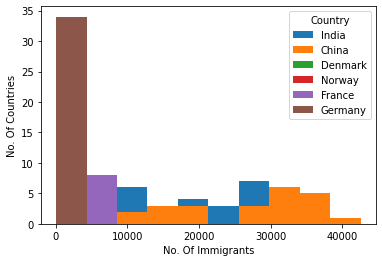

In [39]:
canada.loc[['India','China','Denmark','Norway','France','Germany'], years].transpose().plot.hist()
plt.xlabel('No. Of Immigrants')
plt.ylabel('No. Of Countries')

## Bar Plot

Plotting a Horizatal Bar Plot for Immigration from India to Canada

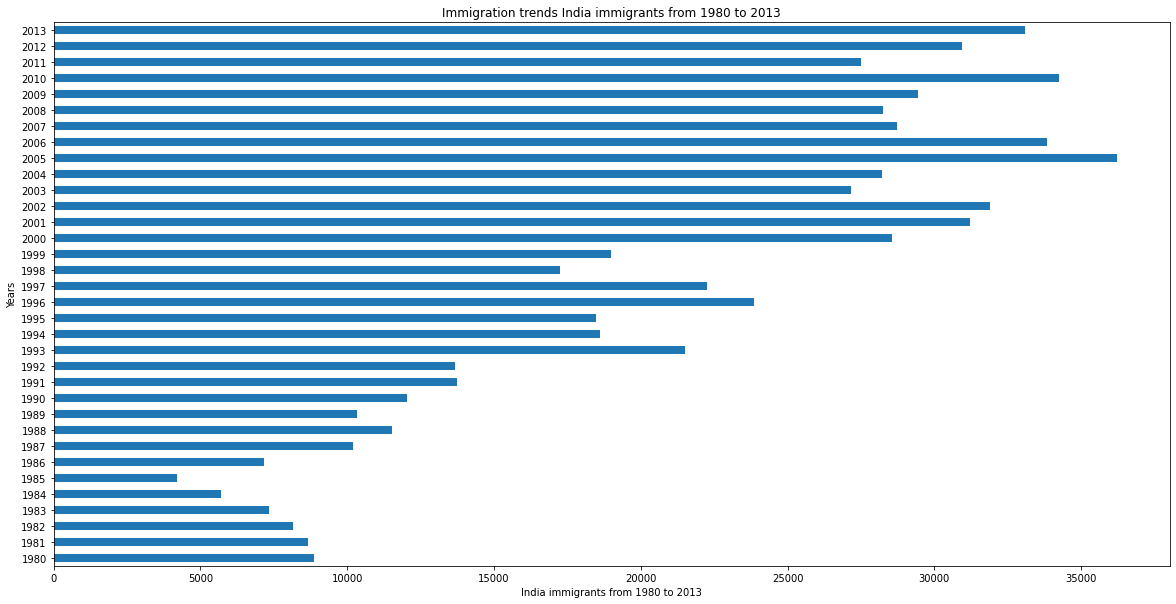

In [40]:
india = canada.loc['India', years]

india.plot(kind='barh', figsize=(20,10))

plt.title('Immigration trends India immigrants from 1980 to 2013')
plt.xlabel('India immigrants from 1980 to 2013')
plt.ylabel('Years')

plt.show()

Plotting a Vertical Bar Plot for Immigration from India to Canada

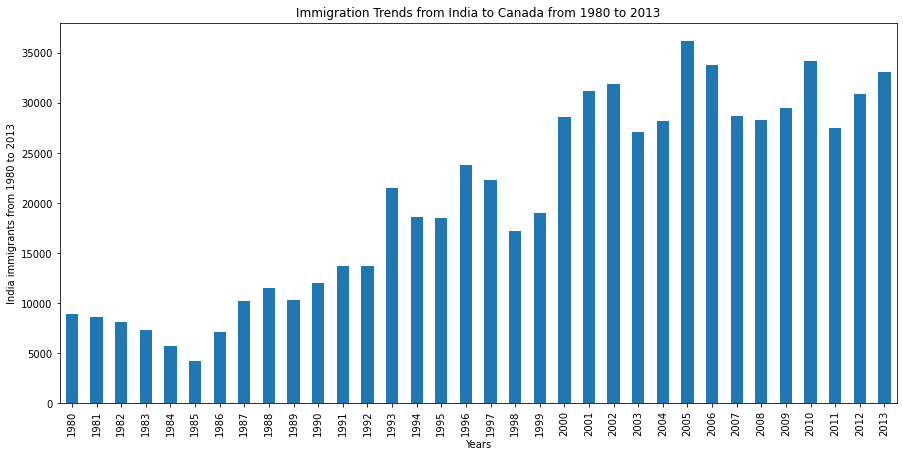

In [41]:
india.plot(kind='bar', figsize=(15,7))

plt.title('Immigration Trends from India to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('India immigrants from 1980 to 2013')
plt.show()

Annoting the above graph

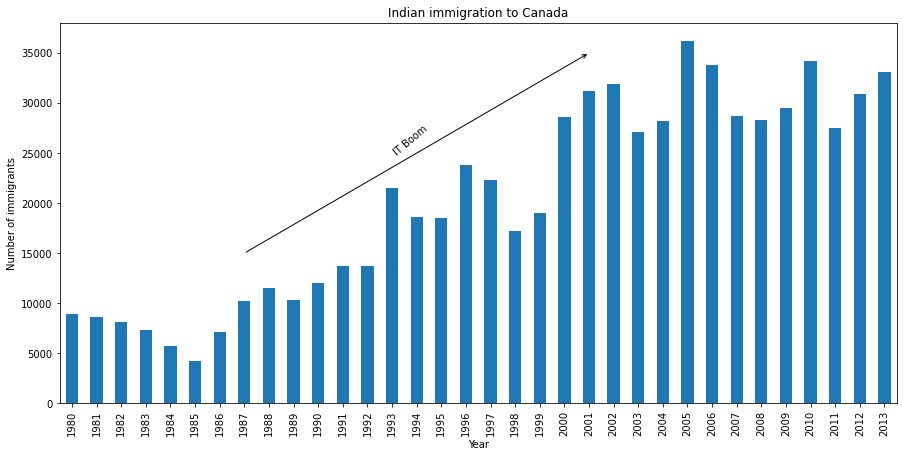

In [42]:
india.plot(kind='bar', figsize=(15,7))
plt.title("Indian immigration to Canada")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.annotate('',  #arrow title
             xy=(21,35000), #x,y of arrow head
             xytext=(7,15000), #x, y of arrow tail
             xycoords='data',  #keep unchanged
             arrowprops=dict(arrowstyle='->',color='black') #arrow style with color
             )

plt.annotate('IT Boom', #add text to arrow
             xy=(13,28000),  #x, y of text position
             rotation=40, # counter clockwise rotate text by angle
             xycoords='data', #keep unchanged
             va='top', #position text 
             ha='left') #position text
plt.show()

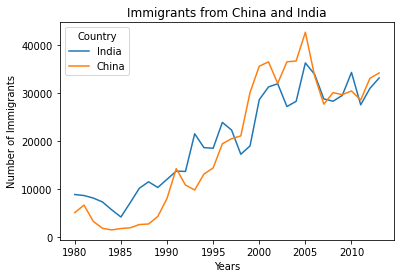

In [43]:
df_CI = canada.loc[['India', 'China'], years]
df_CI = df_CI.transpose()
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


## On going through the data and visualiation, we can say India and China have simillar immigrtion trends.